In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [244]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [245]:
df = pd.read_csv("/content/retrolux_option_calculations.csv")

In [246]:
df.head()

,id,option_id,started_at,finished_at,total_fixture_cost,total_replacement_cost,total_incentives,net_replacement_cost,total_fixture_cost_no_markup,created_at,updated_at,existing_kwh,proposed_kwh,kwh_proposed_annual_savings,original_cost_per_year,replacement_cost_per_year,total_savings_per_year,total_encentiv_savings,total_incentive_179d,total_labor_cost,total_shipping_cost,total_misc_cost,total_tax_cost,total_cogs,total_savings_per_lamp_life,loan_payment,loan_duration,loan_principal,started_at_all,started_at_option,original_energy_cost_per_year,original_maintenance_cost_per_year,original_heating_cost_per_year,original_cooling_cost_per_year,replacement_energy_cost_per_year,replacement_maintenance_cost_per_year,replacement_heating_cost_per_year,replacement_cooling_cost_per_year,energy_savings_per_year,maintenance_savings_per_year,heating_savings_per_year,cooling_savings_per_year,total_recycling_cost,existing_kw,proposed_kw,kw_proposed_annual_savings,payback,original_demand_cost_per_year,replacement_demand_cost_per_year,demand_savings_per_year,internal_return,loan_payment_without_tax,total_replacement_cost_post_financing,net_replacement_cost_post_financing
0,1779,1,2020-03-22 1:55:47,2020-03-22 1:55:53,0,281.52,0.00,281.52,0.00,2018-05-08 7:04:57,2020-03-22 1:55:53,25788.86,25788.86,0.00,2080.15,2080.15,0.00,0.00,0.00,0.00,0.00,0.00,11.52,11.52,0.00,nan,nan,nan,2020-03-22 1:55:47,2020-03-22 1:55:47,2002.15,78.00,0.00,0.00,2002.15,78.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.10,14.10,0.00,nan,0.00,0.00,0.00,0.00,nan,281.52,281.52
1,1224,2,2020-03-22 5:35:15,2020-03-22 5:35:17,0,0.00,0.00,0.00,0.00,2018-05-08 6:04:13,2020-03-22 5:35:17,1000.00,1000.00,0.00,123.22,123.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,2020-03-22 5:35:15,2020-03-22 5:35:15,120.00,29.17,-42.66,16.71,120.00,29.17,-42.66,16.71,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,nan,0.00,0.00,0.00,0.00,nan,0.00,0.00
2,1242,3,2020-03-22 5:34:38,2020-03-22 5:34:40,3000,3740.00,0.00,3740.00,2000.00,2018-05-08 6:04:22,2020-03-22 5:34:40,21900.00,1900.00,20000.00,1850.88,254.95,1595.94,0.00,0.00,0.00,200.00,200.00,340.00,2740.00,-0.00,nan,nan,nan,2020-03-22 5:34:38,2020-03-22 5:34:38,2190.00,103.33,-747.44,304.99,190.00,103.33,-64.85,26.46,2000.00,-0.00,-682.59,278.53,0.00,21.90,1.90,20.00,nan,0.00,0.00,0.00,0.00,nan,3740.00,3740.00
3,1229,4,2020-03-22 5:35:08,2020-03-22 5:35:15,4819.5,7727.61,1198.62,6528.99,2639.50,2018-05-08 6:04:15,2020-03-22 5:35:15,325408.40,215703.44,109704.96,39049.01,25884.41,13164.60,1198.62,0.00,2300.00,300.00,0.00,308.12,5547.61,58521.00,nan,nan,nan,2020-03-22 5:35:08,2020-03-22 5:35:08,39049.01,0.00,0.00,0.00,25884.41,0.00,0.00,0.00,13164.60,0.00,0.00,0.00,0.00,76.03,50.40,25.63,1.32,0.00,0.00,0.00,75.00,nan,7727.61,6528.99
4,1245,5,2020-03-22 5:33:12,2020-03-22 5:33:44,145243.504,216562.11,0.00,216562.11,103745.36,2018-05-08 6:04:27,2020-03-22 5:33:44,1217075.76,549512.46,667563.30,60853.79,27475.62,33378.17,0.00,0.00,62604.00,0.00,0.00,8714.61,175063.97,43.34,4667.26,48.00,194905.90,2020-03-22 5:33:12,2020-03-22 5:33:12,60853.79,0.00,0.00,0.00,27475.62,0.00,0.00,0.00,33378.17,0.00,0.00,0.00,0.00,317.69,139.03,178.66,nan,0.00,0.00,0.00,-64.00,nan,216562.11,216562.11


**Investigate all date-time variables**

In [247]:
cols = ['started_at', 'finished_at', 'created_at', 'updated_at', 'started_at_all', 'started_at_option']
for col in cols:  
  df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [248]:
df_datetime = df[['id', 'option_id','started_at', 'finished_at', 'created_at', 'updated_at', 'started_at_all', 'started_at_option']]
df_datetime.head(10)

,id,option_id,started_at,finished_at,created_at,updated_at,started_at_all,started_at_option
0,1779,1,2020-03-22 01:55:47,2020-03-22 01:55:53,2018-05-08 07:04:57,2020-03-22 01:55:53,2020-03-22 01:55:47,2020-03-22 01:55:47
1,1224,2,2020-03-22 05:35:15,2020-03-22 05:35:17,2018-05-08 06:04:13,2020-03-22 05:35:17,2020-03-22 05:35:15,2020-03-22 05:35:15
2,1242,3,2020-03-22 05:34:38,2020-03-22 05:34:40,2018-05-08 06:04:22,2020-03-22 05:34:40,2020-03-22 05:34:38,2020-03-22 05:34:38
3,1229,4,2020-03-22 05:35:08,2020-03-22 05:35:15,2018-05-08 06:04:15,2020-03-22 05:35:15,2020-03-22 05:35:08,2020-03-22 05:35:08
4,1245,5,2020-03-22 05:33:12,2020-03-22 05:33:44,2018-05-08 06:04:27,2020-03-22 05:33:44,2020-03-22 05:33:12,2020-03-22 05:33:12
5,1243,6,2020-03-22 05:34:01,2020-03-22 05:34:22,2018-05-08 06:04:22,2020-03-22 05:34:22,2020-03-22 05:34:01,2020-03-22 05:34:01
6,1262,7,2020-03-22 01:28:09,2020-03-22 01:28:11,2018-05-08 06:04:47,2020-03-22 01:28:11,2020-03-22 01:28:09,2020-03-22 01:28:09
7,1235,8,2020-03-22 05:34:45,2020-03-22 05:34:47,2018-05-08 06:04:18,2020-03-22 05:34:47,2020-03-22 05:34:45,2020-03-22 05:34:45
8,1236,9,2020-03-22 05:34:43,2020-03-22 05:34:45,2018-05-08 06:04:19,2020-03-22 05:34:45,2020-03-22 05:34:43,2020-03-22 05:34:43
9,1230,10,2020-03-22 05:34:53,2020-03-22 05:34:54,2018-05-08 06:04:17,2020-03-22 05:34:54,2020-03-22 05:34:53,2020-03-22 05:34:53


### Question: Does `started_at_all` date is same with `started_at_option` date?

Summary:
- Only 80% is same (Why?)
- Excluding identical `started_at_all` and `started_at_option`, the average difference is 236 days (+- 221 days).

In [249]:
# Only 80% is same
sum(df['started_at_all'] == df['started_at_option'])/len(df)*100

80.26765948883076

In [250]:
df['delta'] = df['started_at_option'] - df['started_at_all']
df['delta'].astype('timedelta64[D]')[df['delta'].astype('timedelta64[D]') > 0].describe()

count    822.00
mean     236.68
std      221.99
min        1.00
25%       14.00
50%      268.50
75%      402.00
max     1015.00
Name: delta, dtype: float64

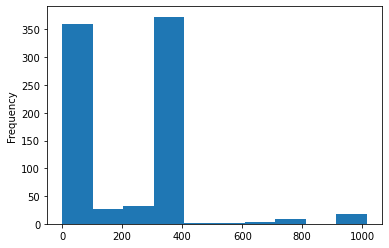

In [251]:
df['delta'].astype('timedelta64[D]')[df['delta'].astype('timedelta64[D]') > 0].plot.hist();

### Question: What is the average differences between `finished_at` and `started_at`?

Summary:
- The average difference is only 12 seconds (+- 1 minuted 40 seconds). What does it mean?

In [252]:
df['delta2'] = df['finished_at'] - df['started_at']
df['delta2'].describe()

count                         9937
mean     0 days 00:00:12.389654825
std      0 days 00:01:40.896195149
min                0 days 00:00:00
25%                0 days 00:00:02
50%                0 days 00:00:04
75%                0 days 00:00:08
max                0 days 01:23:57
Name: delta2, dtype: object

### Question: What is the average differences between `created_at` and `updated_at`?

Summary:
- The average difference is only 306 days (+- 287 days). What does it mean?

In [253]:
df['delta3'] = df['updated_at'] - df['created_at']
df['delta3'].describe()

count                           9938
mean     306 days 16:11:16.541960140
std      287 days 12:43:18.466779532
min                  0 days 00:00:00
25%          55 days 01:35:05.250000
50%                197 days 04:16:47
75%                599 days 00:15:33
max               1089 days 15:47:48
Name: delta3, dtype: object

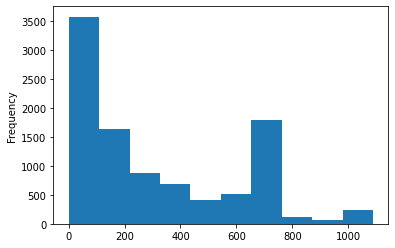

In [254]:
df['delta3'].astype('timedelta64[D]').plot.hist();

### Proportion of `total_incentives` with 'net_replacement_cost`

Summary:
  - `total_replacement_cost` is the sum of `net_replacement_cost` and `total_incentives`

In [255]:
df[round(df['total_replacement_cost'] - df['net_replacement_cost'] - df['total_incentives']) != 0]

,id,option_id,started_at,finished_at,total_fixture_cost,total_replacement_cost,total_incentives,net_replacement_cost,total_fixture_cost_no_markup,created_at,updated_at,existing_kwh,proposed_kwh,kwh_proposed_annual_savings,original_cost_per_year,replacement_cost_per_year,total_savings_per_year,total_encentiv_savings,total_incentive_179d,total_labor_cost,total_shipping_cost,total_misc_cost,total_tax_cost,total_cogs,total_savings_per_lamp_life,loan_payment,loan_duration,loan_principal,started_at_all,started_at_option,original_energy_cost_per_year,original_maintenance_cost_per_year,original_heating_cost_per_year,original_cooling_cost_per_year,replacement_energy_cost_per_year,replacement_maintenance_cost_per_year,replacement_heating_cost_per_year,replacement_cooling_cost_per_year,energy_savings_per_year,maintenance_savings_per_year,heating_savings_per_year,cooling_savings_per_year,total_recycling_cost,existing_kw,proposed_kw,kw_proposed_annual_savings,payback,original_demand_cost_per_year,replacement_demand_cost_per_year,demand_savings_per_year,internal_return,loan_payment_without_tax,total_replacement_cost_post_financing,net_replacement_cost_post_financing,delta,delta2,delta3
9389,9677,9681,NaT,NaT,NaN,nan,nan,nan,nan,2021-02-10 17:27:05,2021-02-10 17:27:05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,0 days


### total_savings_per_year

Summary:
  - The value is range is extremely huge, I think we need to connect it with another file so we can identify and categorize them accordingly.

In [256]:
df['total_savings_per_year'].describe()

count          9937.00
mean        4673734.48
std       460485638.47
min        -2223105.17
25%             163.07
50%            2889.49
75%           10677.79
max     45902400000.00
Name: total_savings_per_year, dtype: float64

### Features Correlation

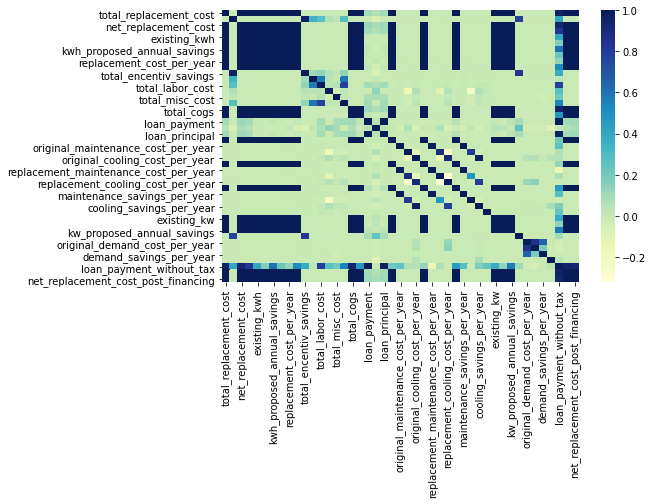

In [257]:
plt.figure(figsize=(8,5))
df_corr = df.drop(['id','option_id'], axis=1).corr()
sns.heatmap(df_corr, cmap="YlGnBu")

In [258]:
high_correlation = set()

for i in range(len(df_corr.columns)):
    for j in range(i):
        if abs(df_corr.iloc[i, j]) >= 0.99:
            high_correlation.add(df_corr.columns[i])

correlated_features

{'energy_savings_per_year',
 'existing_kw',
 'existing_kwh',
 'kw_proposed_annual_savings',
 'kwh_proposed_annual_savings',
 'loan_payment_without_tax',
 'loan_principal',
 'maintenance_savings_per_year',
 'net_replacement_cost',
 'net_replacement_cost_post_financing',
 'original_cost_per_year',
 'original_energy_cost_per_year',
 'proposed_kw',
 'proposed_kwh',
 'replacement_cost_per_year',
 'replacement_energy_cost_per_year',
 'replacement_maintenance_cost_per_year',
 'total_cogs',
 'total_fixture_cost_no_markup',
 'total_replacement_cost_post_financing',
 'total_savings_per_lamp_life',
 'total_savings_per_year'}